In [1]:
import numpy 
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error as MSE

import warnings
warnings.filterwarnings("ignore")

In [2]:
addpath = "./input/"
df = pd.read_csv(addpath + "train.csv")
df_test = pd.read_csv(addpath + "test.csv")

data = pd.concat([df, df_test], sort=False)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.8,0.63,0.24,2.4,0.078,6.1,32.6,0.9997,3.08,0.57,9.4,5.1
1,6.1,0.34,0.25,1.8,0.084,4.0,28.0,0.9941,3.36,0.44,10.2,4.8
2,7.1,0.43,0.17,1.8,0.083,27.2,51.3,0.9941,3.51,0.63,10.4,5.5
3,8.6,0.47,0.27,1.9,0.058,17.5,37.6,0.9907,3.16,0.85,11.1,6.1
4,6.9,0.41,0.30,8.9,0.084,25.9,45.4,0.9861,3.35,0.64,10.2,5.6


In [4]:
df.isnull().sum()
data.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                 147
pH                      161
sulphates                 0
alcohol                   0
quality                 319
dtype: int64

In [5]:
#Fill NaN value with its whole mean value.
# density part
df["density"].fillna(data["density"].mean(), inplace=True)
df_test["density"].fillna(data["density"].mean(), inplace=True)

# pH part
df["pH"].fillna(data["pH"].mean(), inplace=True)
df_test["pH"].fillna(data["pH"].mean(), inplace=True)

In [6]:
df_test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [7]:
df[df["quality"] < 6].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.8,0.63,0.24,2.4,0.078,6.1,32.6,0.9997,3.08,0.57,9.4,5.1
1,6.1,0.34,0.25,1.8,0.084,4.0,28.0,0.9941,3.36,0.44,10.2,4.8
2,7.1,0.43,0.17,1.8,0.083,27.2,51.3,0.9941,3.51,0.63,10.4,5.5
4,6.9,0.41,0.30,8.9,0.084,25.9,45.4,0.9861,3.35,0.64,10.2,5.6
5,8.0,0.82,0.29,4.3,0.082,20.8,65.7,0.9934,3.15,0.53,9.4,5.3


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1280.00000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,8.34125,0.527187,0.271383,2.549766,0.087614,15.599844,45.652812,0.996999,3.309692,0.658953,10.427813,5.614297
std,1.74115,0.181153,0.194353,1.452651,0.049233,10.482150,32.914044,0.009760,0.149536,0.175200,1.065322,0.987628
min,4.70000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.951600,2.720000,0.330000,8.400000,2.500000
25%,7.10000,0.390000,0.100000,1.900000,0.070000,7.000000,21.675000,0.991000,3.220000,0.550000,9.500000,4.900000
50%,8.00000,0.520000,0.260000,2.200000,0.079000,13.100000,36.800000,0.996805,3.312086,0.620000,10.200000,5.500000
75%,9.30000,0.640000,0.430000,2.600000,0.090250,20.925000,60.350000,1.002600,3.390000,0.730000,11.100000,6.300000
max,15.90000,1.610000,1.000000,15.500000,0.615000,71.800000,290.300000,1.029000,3.970000,2.050000,15.000000,9.700000


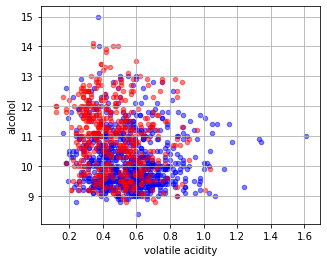

In [9]:
fig, ax = plt.subplots(1, 1)

df[df["quality"] < 6].plot(kind="scatter", x=u"volatile acidity", y=u"alcohol", ax=ax, c="blue", alpha=0.5)

df[df["quality"] >= 6].plot(kind="scatter", x=u"volatile acidity", y=u"alcohol", ax=ax, c="red", alpha=0.5, grid=True, figsize=(5,4))

plt.show()

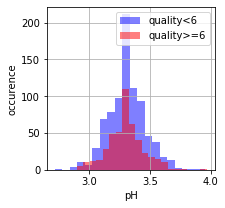

In [10]:
df[df["quality"] < 6]["pH"].hist(figsize=(3, 3), bins=20, alpha=0.5, color="blue", label="quality<6")
df[df["quality"] >= 6]["pH"].hist(figsize=(3, 3), bins=20, alpha=0.5, color="red", label="quality>=6")
plt.ylabel("occurence")
plt.xlabel("pH")
plt.legend(loc="best")

In [11]:
df["class"] = [0 if i<6 else 1 for i in df["quality"].tolist()]

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,9.8,0.63,0.24,2.4,0.078,6.1,32.6,0.9997,3.08,0.57,9.4,5.1,0
1,6.1,0.34,0.25,1.8,0.084,4.0,28.0,0.9941,3.36,0.44,10.2,4.8,0
2,7.1,0.43,0.17,1.8,0.083,27.2,51.3,0.9941,3.51,0.63,10.4,5.5,0
3,8.6,0.47,0.27,1.9,0.058,17.5,37.6,0.9907,3.16,0.85,11.1,6.1,1
4,6.9,0.41,0.30,8.9,0.084,25.9,45.4,0.9861,3.35,0.64,10.2,5.6,0


In [13]:
color_codes = {0:"#0000FF", 1:"#FF0000"}
colors = [color_codes[x] for x in df["class"].tolist()]

In [14]:
df.columns[:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [15]:
dfs = df.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

In [16]:
dfs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,0.837808,0.567545,-0.161473,-0.103098,-0.195275,-0.906288,-0.396573,0.276763,-1.536033,-0.507723,-0.964791,-0.520739,-0.734773
1,-1.287224,-1.033311,-0.110021,-0.516136,-0.073407,-1.106628,-0.536331,-0.296979,0.336427,-1.249732,-0.213844,-0.824498,-0.734773
2,-0.712891,-0.536493,-0.521643,-0.516136,-0.093718,1.106658,0.171574,-0.296979,1.339531,-0.165257,-0.026107,-0.115729,-0.734773
3,0.148609,-0.315686,-0.007115,-0.447296,-0.601502,0.181275,-0.244662,-0.645322,-1.001045,1.090450,0.630971,0.491787,1.359902
4,-0.827757,-0.646897,0.147244,4.371479,-0.073407,0.982638,-0.007681,-1.116610,0.269554,-0.108180,-0.213844,-0.014476,-0.734773


In [17]:
X = dfs.drop(["quality", "class"], axis=1)
y = df.iloc[:, 12]
X_test = df_test
# y_test = df_test["quality"]
print(X.shape)
print(X_test.shape)

(1280, 11)
(319, 11)


In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 11 columns):
fixed acidity           319 non-null float64
volatile acidity        319 non-null float64
citric acid             319 non-null float64
residual sugar          319 non-null float64
chlorides               319 non-null float64
free sulfur dioxide     319 non-null float64
total sulfur dioxide    319 non-null float64
density                 319 non-null float64
pH                      319 non-null float64
sulphates               319 non-null float64
alcohol                 319 non-null float64
dtypes: float64(11)
memory usage: 27.5 KB


In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
y_train.head()

136     1
310     1
1067    1
842     0
1187    0
Name: class, dtype: int64